In [1]:
"""Build a Multiclass classifier using the CNN model. Use MNIST or any other suitable dataset. a. Perform Data Pre-processing 
 b. Define Model and perform training c. Evaluate Results using confusion matrix."""

'Build a Multiclass classifier using the CNN model. Use MNIST or any other suitable dataset. a. Perform Data Pre-processing \n b. Define Model and perform training c. Evaluate Results using confusion matrix.'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# Reshape for CNN input and normalize
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

In [5]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [6]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

C:\Users\darsh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Train model
model.fit(X_train, y_train_cat, epochs=5, batch_size=128, validation_split=0.1)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.8469 - loss: 0.5230 - val_accuracy: 0.9753 - val_loss: 0.0818
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9791 - loss: 0.0672 - val_accuracy: 0.9862 - val_loss: 0.0455
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9867 - loss: 0.0425 - val_accuracy: 0.9883 - val_loss: 0.0426
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9894 - loss: 0.0323 - val_accuracy: 0.9907 - val_loss: 0.0339
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9924 - loss: 0.0242 - val_accuracy: 0.9875 - val_loss: 0.0437


In [9]:
# Evaluate on test data
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {accuracy*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9853 - loss: 0.0445
Test Accuracy: 98.79%


In [10]:
# Predict classes
y_pred = np.argmax(model.predict(X_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


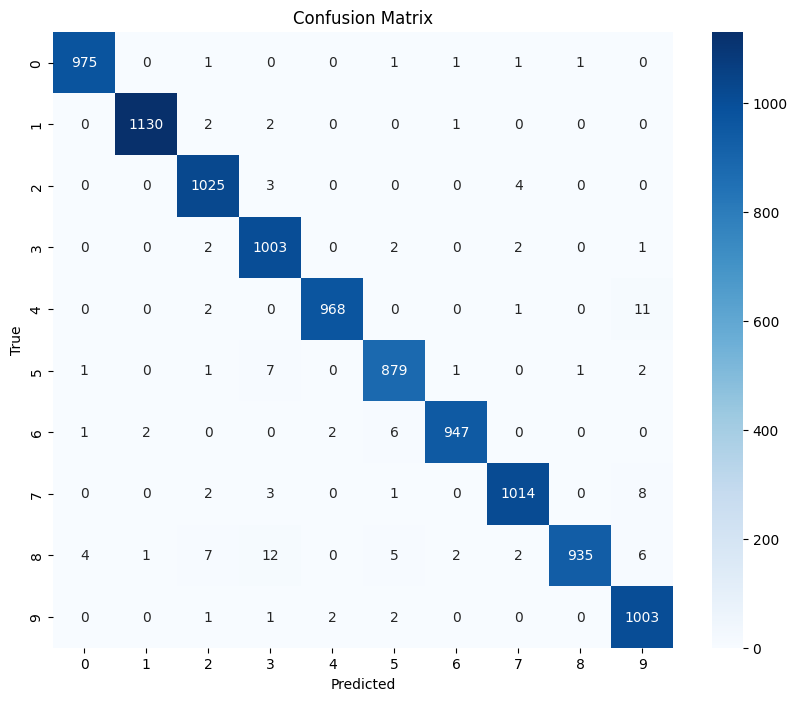

In [11]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()